In [487]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [488]:
path = "/content/usps.h5"

In [489]:
import h5py
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_train = train.get('data')[:]
        y_train = train.get('target')[:]
        test = hf.get('test')
        X_test = test.get('data')[:]
        y_test = test.get('target')[:]


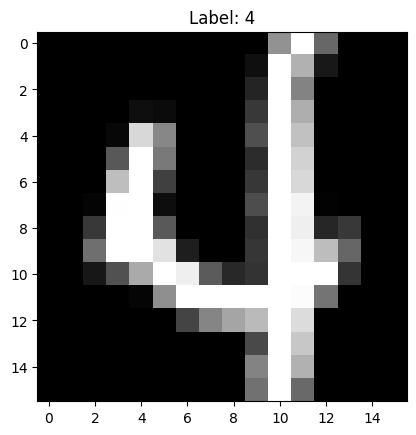

In [490]:
plt.imshow(X_train[2].reshape(16,16), cmap='gray')
plt.title(f'Label: {y_train[2]}')
plt.show()

In [491]:
print("Shape of the Train data features")
print(X_train.shape)
print("Shape of the Train data target")
print(y_train.shape)
print("Shape of the Test data features")
print(X_test.shape)
print("Shape of the Test data target")

print(y_test.shape)

Shape of the Train data features
(7291, 256)
Shape of the Train data target
(7291,)
Shape of the Test data features
(2007, 256)
Shape of the Test data target
(2007,)


In [492]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


**Using PCA and Standard**

In [493]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [494]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**KNN Models**

In [495]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [496]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, X_train, y_train, cv=10)


In [497]:
print("Train accuracy: ", scores.mean())

Train accuracy:  0.9729802506717778


In [498]:

clf.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [499]:
# Evaluate on test set
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [500]:
print("Test accuracy :",test_accuracy)

Test accuracy : 0.9486796213253612


In [501]:
from sklearn.metrics import confusion_matrix, classification_report

In [502]:
print(confusion_matrix(y_true=y_test, y_pred= y_pred))

[[355   0   3   0   0   0   0   0   0   1]
 [  0 257   0   0   4   0   2   1   0   0]
 [  7   0 185   1   1   0   0   1   3   0]
 [  3   0   1 153   0   6   0   0   1   2]
 [  0   1   2   0 183   1   2   2   1   8]
 [  3   1   2   2   0 148   0   0   1   3]
 [  3   1   1   0   2   0 163   0   0   0]
 [  0   1   1   1   3   0   0 140   0   1]
 [  4   0   2   1   0   2   1   1 153   2]
 [  1   1   1   0   3   0   0   3   1 167]]


In [503]:
from sklearn.metrics import precision_score, recall_score

print("Precison score")
print(precision_score(y_true=y_test, y_pred=y_pred, average="macro"))
print("Recall score")
print(recall_score(y_true=y_test, y_pred=y_pred, average="macro"))

Precison score
0.9484154196887384
Recall score
0.9434767022174325


In [504]:
train_scores = []
test_scores = []

for i in range(1,11):
  print("For k value ", i, " :")
  clf = KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(clf, X_train, y_train, cv=10)
  score = scores.mean()
  test_score = clf.fit(X_train, y_train).score(X_test, y_test)
  train_scores.append(score)
  test_scores.append(test_score)
  print(f"Neighbors: {i}, Train accuracy: {score:.4f}, Test accuracy: {test_score:.4f}")
  print("Confusion matrix :")
  print(confusion_matrix(y_true=y_test, y_pred= clf.predict(X_test)))
  print("Precision score : ")
  print(precision_score(y_true=y_test, y_pred=clf.predict(X_test), average="macro"))
  print("Recall score : ")
  print(recall_score(y_true=y_test, y_pred=clf.predict(X_test), average="macro"))
  print("----------------------------")



For k value  1  :
Neighbors: 1, Train accuracy: 0.9733, Test accuracy: 0.9482
Confusion matrix :
[[355   0   2   0   0   0   0   1   0   1]
 [  0 255   0   0   6   0   2   1   0   0]
 [  4   0 186   2   1   0   0   1   4   0]
 [  2   0   1 153   0   9   0   0   0   1]
 [  0   2   0   0 184   2   2   2   1   7]
 [  2   1   2   2   0 149   0   0   3   1]
 [  0   0   1   0   2   4 163   0   0   0]
 [  0   1   1   1   4   0   0 136   2   2]
 [  2   0   2   5   0   2   0   0 151   4]
 [  0   0   1   0   1   0   0   3   1 171]]
Precision score : 
0.9438701530347882
Recall score : 
0.9426831562580743
----------------------------
For k value  2  :
Neighbors: 2, Train accuracy: 0.9667, Test accuracy: 0.9482
Confusion matrix :
[[355   0   3   0   0   0   0   0   0   1]
 [  0 260   0   0   3   0   1   0   0   0]
 [  9   0 185   1   1   0   0   1   1   0]
 [  3   0   1 155   0   6   0   0   0   1]
 [  1   2   2   0 187   1   0   2   0   5]
 [  3   1   2   8   0 146   0   0   0   0]
 [  3   0   1  

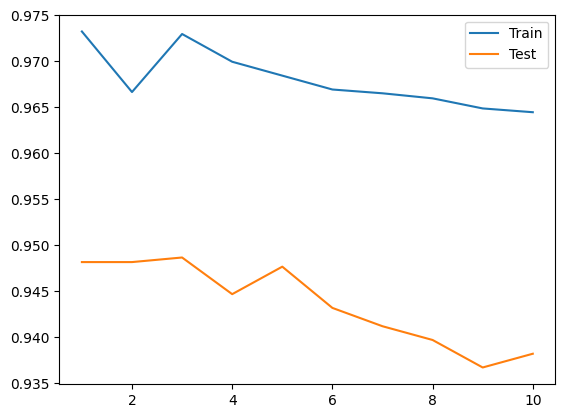

In [505]:
plt.plot(range(1,11), train_scores, label="Train")
plt.plot(range(1,11), test_scores, label="Test")
plt.legend()
plt.show()

**Naive Bayes Model**

In [506]:
from scipy.ndimage.interpolation import shift
from sklearn.metrics import accuracy_score

<ipython-input-506-7b5c807e8aaf>:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [507]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

scores  = cross_val_score(nb, X_train, y_train, cv=10)
print("Train accuracy: ", scores.mean())
nb.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb.predict(X_test)

# Compute metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')

# Print results
print(f"Naïve Bayes Test Accuracy: {accuracy_nb:.4f}")
print(f"Naïve Bayes Test Precision: {precision_nb:.4f}")
print(f"Naïve Bayes Test Recall: {recall_nb:.4f}")

print("Confusion matrix naive bayes")
print(confusion_matrix(y_true=y_test, y_pred= y_pred_nb))

Train accuracy:  0.9009720578010786
Naïve Bayes Test Accuracy: 0.8670
Naïve Bayes Test Precision: 0.8603
Naïve Bayes Test Recall: 0.8568
Confusion matrix naive bayes
[[338   0   6   1   2   6   6   0   0   0]
 [  1 233   0   2   5   3   9   1   3   7]
 [  1   0 171   5   8   1   2   2   8   0]
 [  1   0   5 138   1  16   1   1   2   1]
 [  1   1   9   0 177   1   1   1   0   9]
 [  3   0   2  10   4 136   0   0   2   3]
 [  4   0   8   0   5  13 139   0   1   0]
 [  0   0   2   0   8   3   0 124   2   8]
 [  2   0   6  10   5  12   1   0 128   2]
 [  2   0   2   1   9   2   0   2   3 156]]
